In [9]:
import numpy as np
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt 

In [17]:
galaxies = pd.read_csv('truth_DP0_phosim_real.csv')
ra = galaxies['ra_1']
dec = galaxies['dec_1']

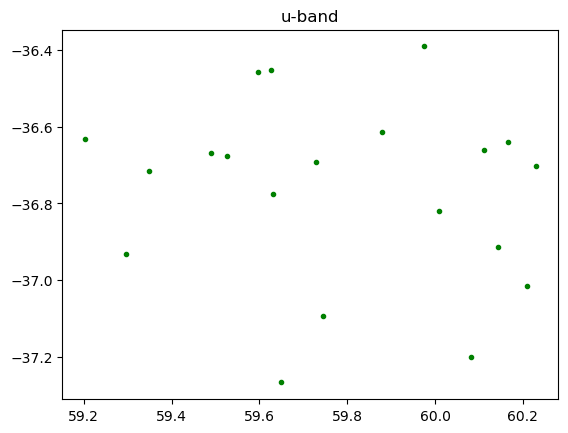

In [18]:
scatter = plt.plot(ra, dec, '.g') 
plt.title('u-band')
#plt.xlabel('MJD')
#plt.ylabel('u-band magnitude')
#plt.xlim(57980,57996)
#plt.gca().invert_yaxis()
plt.show()